In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks for Inverse Problems

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pinn import Pinns

## Set up

In [3]:
kwargs = {
    "alpha_f" : 0.005,
    "h_f" : 5,
    "T_hot" : 4,
    "T0" : 1,
    "T_cold" : 1,
}

t0 = 0
tf = 8
n_int = 128*tf
n_sb = 64*tf
n_tb = 64

pinn = Pinns(n_int, n_sb, n_tb, t0, tf, **kwargs)

Charging
Idle
Discharging
Idle
Charging
Idle
Discharging
Idle


In [4]:
# Plot the input training points

input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()
input_meas_, output_meas_ = pinn.get_measurement_data()

Charging
Idle
Discharging
Idle
Charging
Idle
Discharging
Idle


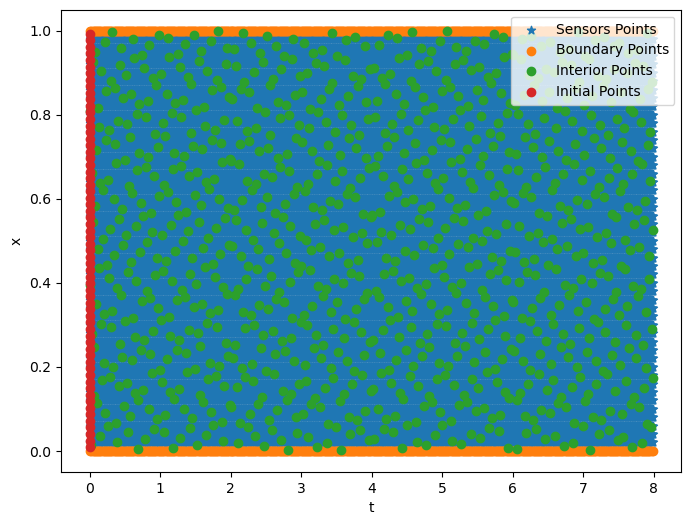

In [5]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(
    input_meas_[:, 0].detach().numpy(),
    input_meas_[:, 1].detach().numpy(), 
    label="Sensors Points", marker="*")
plt.scatter(
    input_sb_[:, 0].detach().numpy(),
    input_sb_[:, 1].detach().numpy(),
    label="Boundary Points")
plt.scatter(
    input_int_[:, 0].detach().numpy(),
    input_int_[:, 1].detach().numpy(),
    label="Interior Points")
plt.scatter(
    input_tb_[:, 0].detach().numpy(),
    input_tb_[:, 1].detach().numpy(),
    label="Initial Points")

plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

## Training

In [6]:
hist = pinn.fit(num_epochs=2, max_iter=10000, verbose=True)

################################  0  ################################
Total loss:  1.8835 | PDE Loss:  -0.8041 | Function Loss:  0.8826
Total loss:  1.8717 | PDE Loss:  -1.2027 | Function Loss:  0.8713
Total loss:  1.7755 | PDE Loss:  0.0554 | Function Loss:  0.7671
Total loss:  1.6144 | PDE Loss:  1.0303 | Function Loss:  0.4833
Total loss:  1.5617 | PDE Loss:  1.0697 | Function Loss:  0.3929
Total loss:  1.3648 | PDE Loss:  0.8714 | Function Loss:  0.1966
Total loss:  1.2098 | PDE Loss:  -0.3099 | Function Loss:  0.1965
Total loss:  1.188 | PDE Loss:  -0.423 | Function Loss:  0.1772
Total loss:  1.1722 | PDE Loss:  -0.571 | Function Loss:  0.1643
Total loss:  1.162 | PDE Loss:  -0.7383 | Function Loss:  0.1565
Total loss:  1.1542 | PDE Loss:  -0.9427 | Function Loss:  0.1507
Total loss:  1.1476 | PDE Loss:  -1.2013 | Function Loss:  0.1456
Total loss:  1.1415 | PDE Loss:  -1.4924 | Function Loss:  0.1405
Total loss:  1.1369 | PDE Loss:  -1.5316 | Function Loss:  0.1359
Total loss:  1

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

## Visualization

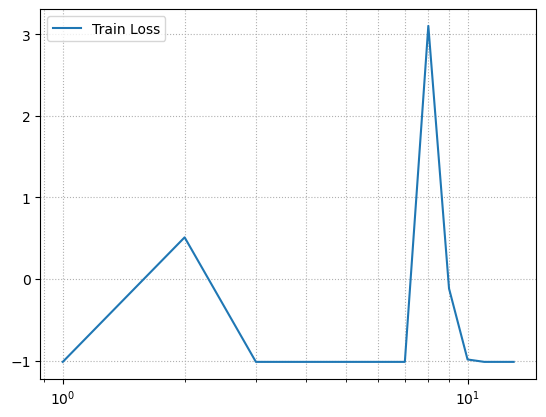

In [ ]:
pinn.plot_loss_function(hist)

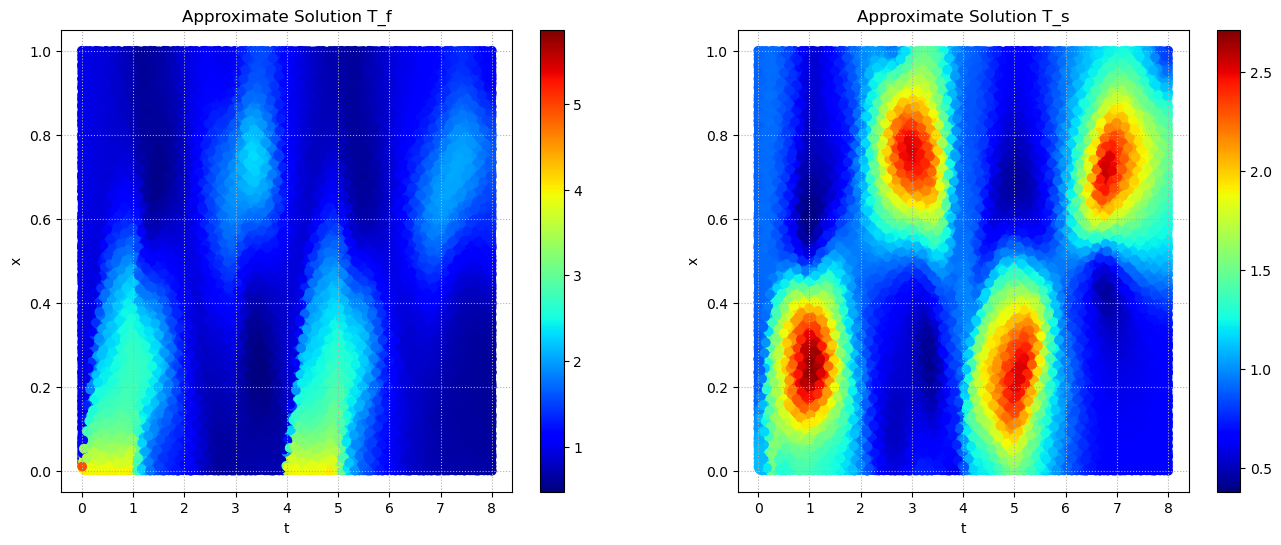

In [7]:
pinn.plot()

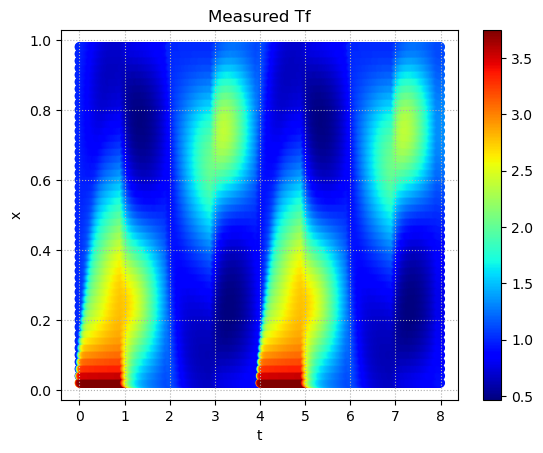

In [8]:
pinn.plot_reference()

In [ ]:
import torch
torch.save(pinn.approximate_solution.state_dict(), f'saved_models/pinn_complete.pth')
